In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_canada = pd.read_csv('Immigration_data.csv')

In [3]:
df_canada.head()

,Unnamed: 0,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [4]:
df_canada = df_canada.drop(['Unnamed: 0'],axis=1)
df_canada = df_canada.rename(columns={'OdName':'Country'})

In [5]:
numeric_columns = df_canada.select_dtypes(include=[int]).columns
df_canada['Total'] = df_canada[numeric_columns].sum(axis=1)

In [6]:
df_canada.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,117278
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,31398
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,138878
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,12
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,30


In [7]:
df_canada = df_canada.rename(columns={'AreaName':'Continent','RegName':'Region'})

In [8]:
df_canada.to_csv('Immigration_data.csv')

In [9]:
# Create a pie chart by immigration by continent
continent = df_canada.groupby(by='Continent',axis=0).sum()
continent.head()

,Country,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,AlgeriaAngolaBeninBotswanaBurkina FasoBurundiC...,Northern AfricaMiddle AfricaWestern AfricaSout...,Developing regionsDeveloping regionsDeveloping...,3951,4363,3819,2671,2639,2650,3782,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,1237896
Asia,AfghanistanArmeniaAzerbaijanBahrainBangladeshB...,Southern AsiaWestern AsiaWestern AsiaWestern A...,Developing regionsDeveloping regionsDeveloping...,31025,34314,30214,24696,27274,23850,28739,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,6635588
Europe,AlbaniaAndorraAustriaBelarusBelgiumBosnia and ...,Southern EuropeSouthern EuropeWestern EuropeEa...,Developed regionsDeveloped regionsDeveloped re...,39760,44802,42720,24638,22287,20844,24370,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,2821894
Latin America and the Caribbean,Antigua and BarbudaArgentinaBahamasBarbadosBel...,CaribbeanSouth AmericaCaribbeanCaribbeanCentra...,Developing regionsDeveloping regionsDeveloping...,13081,15215,16769,15427,13678,15171,21179,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,1530296
Northern America,CanadaUnited States of America,Northern AmericaNorthern America,Developed regionsDeveloped regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,482284


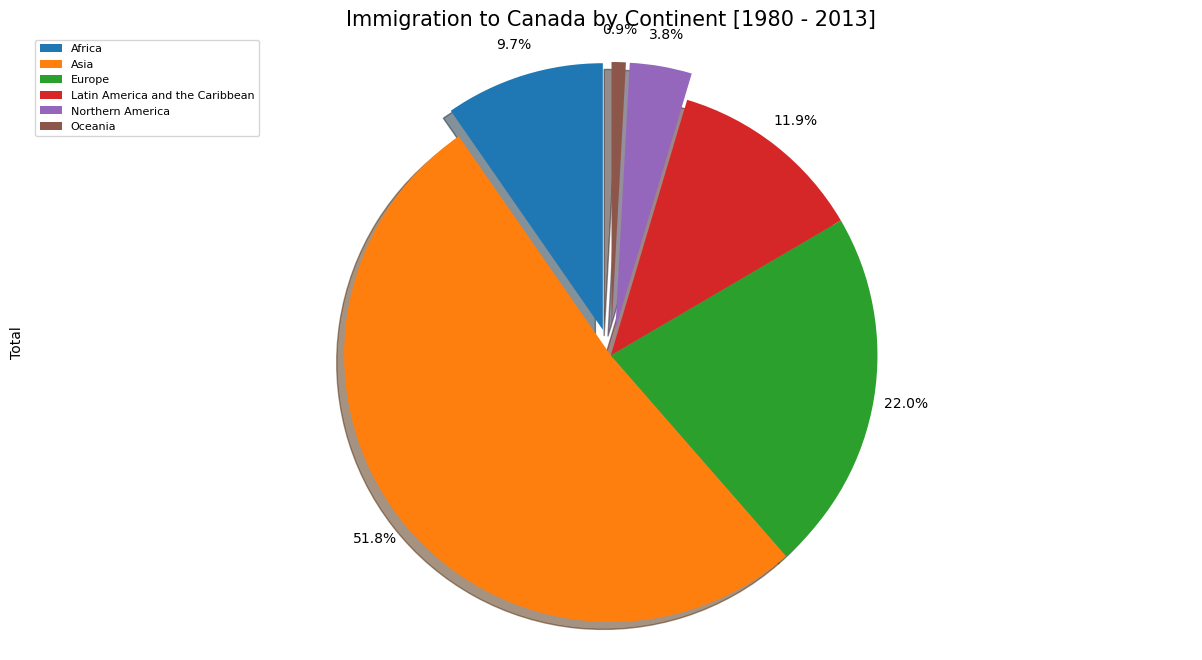

In [10]:
# autopct create %, start angle represent starting point
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]
continent['Total'].plot(kind='pie',
                            figsize=(15, 8),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow
                            labels=None,
                            pctdistance=1.12,
                            explode = explode_list
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]', fontsize=15)
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=continent.index, loc='upper left', fontsize=8) 


plt.show()

In [15]:
# to get a dataframe, place extra square brackets around 'Japan'.
df_canada.set_index('Country', inplace=True)
years = list(map(str,range(1980,2014)))
df_japan = df_canada.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


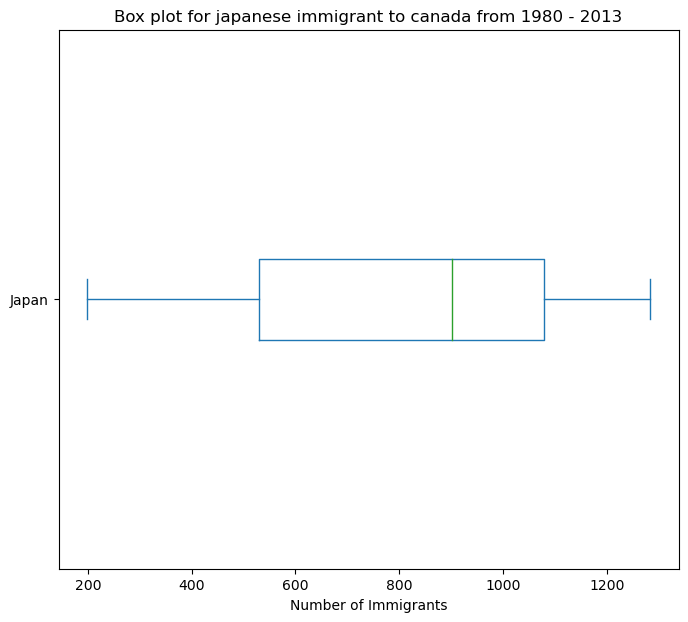

In [24]:
df_japan.plot(kind='box',figsize=(8,7), vert=False)

plt.title('Box plot for japanese immigrant to canada from 1980 - 2013')
plt.xlabel('Number of Immigrants')
plt.show()

In [19]:
df_CI = df_canada.loc[['Nigeria','South Africa'],years].transpose()
df_CI.head()

Country,Nigeria,South Africa
1980,81,1026
1981,60,1118
1982,58,781
1983,58,379
1984,78,271


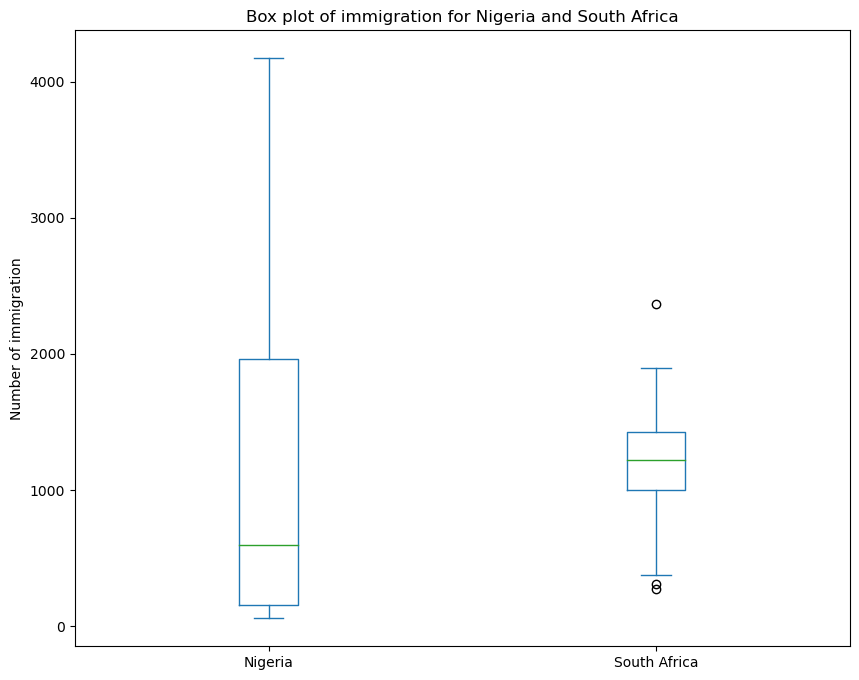

In [21]:
df_CI.plot(kind='box', figsize=(10,8))
plt.title('Box plot of immigration for Nigeria and South Africa')
plt.ylabel('Number of immigration')
plt.show()

In [22]:
df_CI.describe()

Country,Nigeria,South Africa
count,34.000000,34.000000
mean,1168.588235,1193.176471
std,1249.203992,429.023943
min,58.000000,271.000000
25%,157.000000,997.500000
50%,594.000000,1219.000000
75%,1961.250000,1428.750000
max,4172.000000,2366.000000


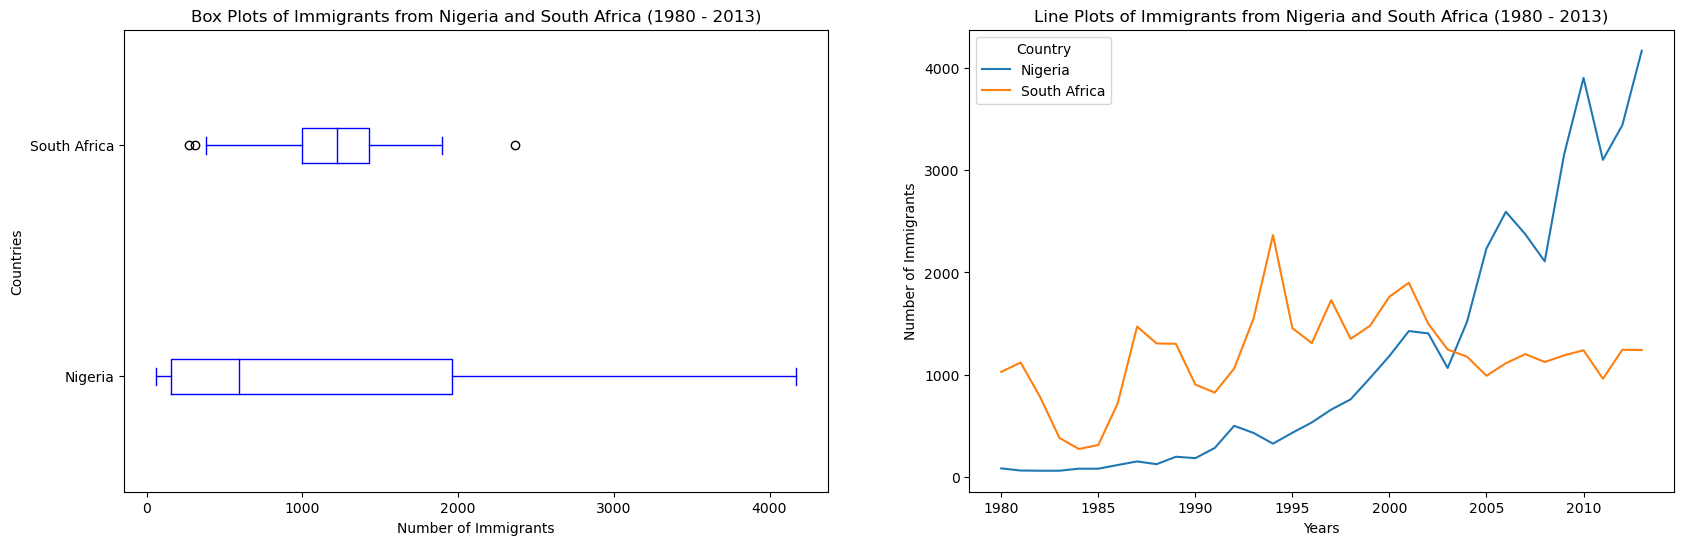

In [27]:
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)


# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from Nigeria and South Africa (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from Nigeria and South Africa (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

In [28]:
# Create a box plot to visualize the distribution of the top 15 countries (based on total immigration)
#grouped by the decades 1980s, 1990s, and 2000s.
df_top15 = df_canada.sort_values(by='Total', ascending=False, axis=0)
df_top15 = df_top15.head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,1383808
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,1319924
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,1103000
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,1022782
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,483200
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,482244
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,351846
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,296716
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,285162


In [29]:
 # create a list of all years in decades 80's, 90's, and 00's
years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010)))


    # slice the original dataframe df_can to create a series for each decade
df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

    # merge the three series into a new data frame
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 

    # display dataframe
new_df.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


In [30]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


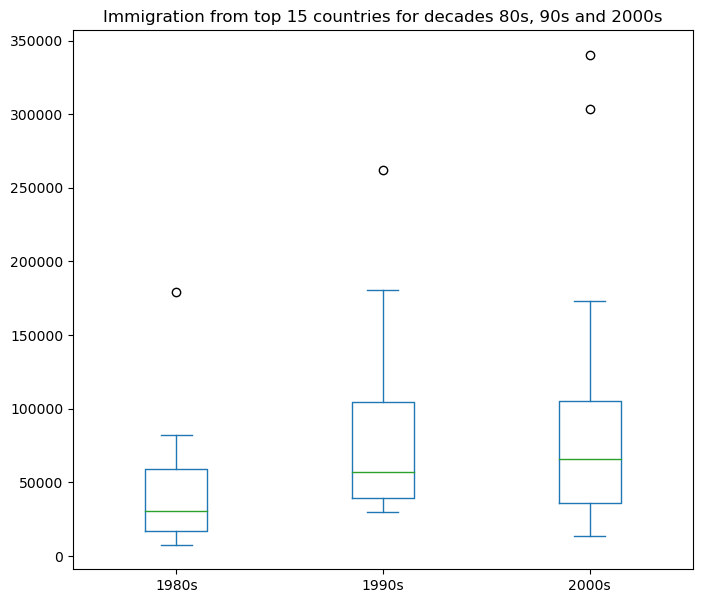

In [31]:
new_df.plot(kind='box', figsize=(8,7))

plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')
plt.show()

Note how the box plot differs from the summary table created. The box plot scans the data and identifies the outliers. In order to be an outlier, the data value must be:

larger than Q3 by at least 1.5 times the interquartile range (IQR), or,
smaller than Q1 by at least 1.5 times the IQR.
Let's look at decade 2000s as an example:

Q1 (25%) = 36,101.5
Q3 (75%) = 105,505.5
IQR = Q3 - Q1 = 69,404
Using the definition of outlier, any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier.

Outlier > 105,505.5 + (1.5 * 69,404)
Outlier > 209,611.5

In [36]:
new_df=new_df.reset_index()
df_outlier = new_df[new_df['2000s'] > 209611.5]
df_outlier
# new_df=new_df.reset_index()
#    new_df[new_df['2000s']> 209611.5]

,level_0,index,Country,1980s,1990s,2000s
0,0,0,India,82154,180395,303591
1,1,1,China,32003,161528,340385


Scatter Plots 
A scatter plot (2D) is a useful method of comparing variables against each other. Scatter plots look similar to line plots in that they both map independent and dependent variables on a 2D graph. While the data points are connected together by a line in a line plot, they are not connected in a scatter plot. The data in a scatter plot is considered to express a trend. With further analysis using tools like regression, we can mathematically calculate this relationship and use it to predict trends outside the dataset.

Let's start by exploring the following:

Using a scatter plot, let's visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.

In [39]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_canada[years].sum(axis=0))
# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


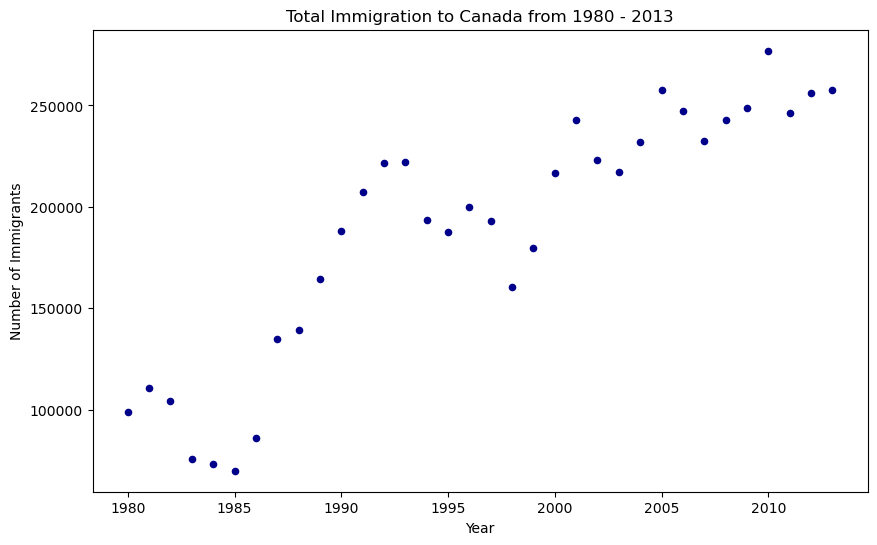

Notice how the scatter plot does not connect the data points together. We can clearly observe an upward trend in the data: as the years go by, the total number of immigrants increases. We can mathematically analyze this upward trend using a regression line (line of best fit).

So let's try to plot a linear line of best fit, and use it to predict the number of immigrants in 2015.

Step 1: Get the equation of line of best fit. We will use Numpy's polyfit() method by passing in the following:

x: x-coordinates of the data.
y: y-coordinates of the data.
deg: Degree of fitting polynomial. 1 = linear, 2 = quadratic, and so on.

In [41]:
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

The output is an array with the polynomial coefficients, highest powers first. Since we are plotting a linear regression y= a * x + b, our output has 2 elements [5.56709228e+03, -1.09261952e+07] with the the slope in position 0 and intercept in position 1.

Step 2: Plot the regression line on the scatter plot.

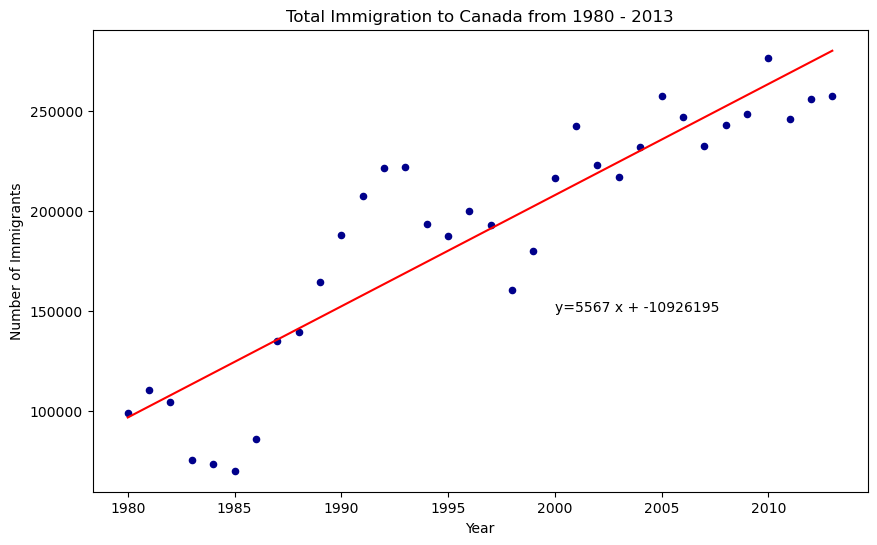

In [44]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

Using the equation of line of best fit, we can estimate the number of immigrants in 2015:

No. Immigrants = 5567 * Year - 10926195
No. Immigrants = 5567 * 2015 - 10926195
No. Immigrants = 291,310
When compared to the actual from Citizenship and Immigration Canada's (CIC) 2016 Annual Report, we see that Canada accepted 271,845 immigrants in 2015. Our estimated value of 291,310 is within 7% of the actual number, which is pretty good considering our original data came from United Nations (and might differ slightly from CIC data).

As a side note, we can observe that immigration took a dip around 1993 - 1997. Further analysis into the topic revealed that in 1993 Canada introcuded Bill C-86 which introduced revisions to the refugee determination system, mostly restrictive. Further amendments to the Immigration Regulations cancelled the sponsorship required for "assisted relatives" and reduced the points awarded to them, making it more difficult for family members (other than nuclear family) to immigrate to Canada. These restrictive measures had a direct impact on the immigration numbers for the next several years.

In [53]:
years = list(map(str,range(1980,2014)))
df_con = df_canada.loc[['Nigeria','Egypt','South Africa', 'Ghana'],years].transpose()

In [54]:
# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_con.sum(axis=1))
 # reset index in place
df_total.reset_index(inplace=True)

# rename columns
df_total.columns = ['year', 'total']

# change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)

# show resulting dataframe
df_total.head()


,year,total
0,1980,1891
1,1981,2034
2,1982,1692
3,1983,1014
4,1984,912


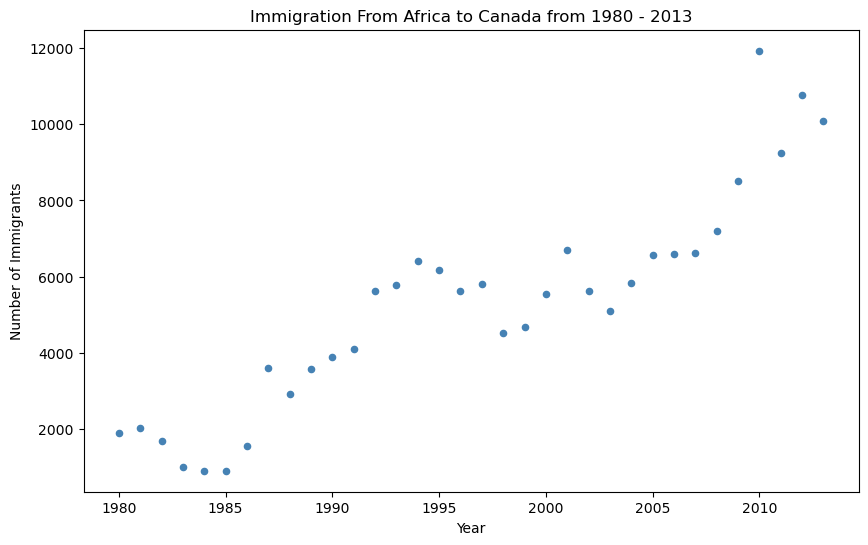

In [56]:
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='steelblue')

plt.title('Immigration From Africa to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

In [57]:
# transposed dataframe
df_can_t = df_canada[years].transpose()

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


Step 2: Create the normalized weights.

There are several methods of normalizations in statistics, each with its own use. In this case, we will use feature scaling to bring all values into the range [0, 1]. The general formula is:

Image
where  𝑋
  is the original value,  𝑋′
  is the corresponding normalized value. The formula sets the max value in the dataset to 1, and sets the min value to 0. The rest of the data points are scaled to a value between 0-1 accordingly.

In [58]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

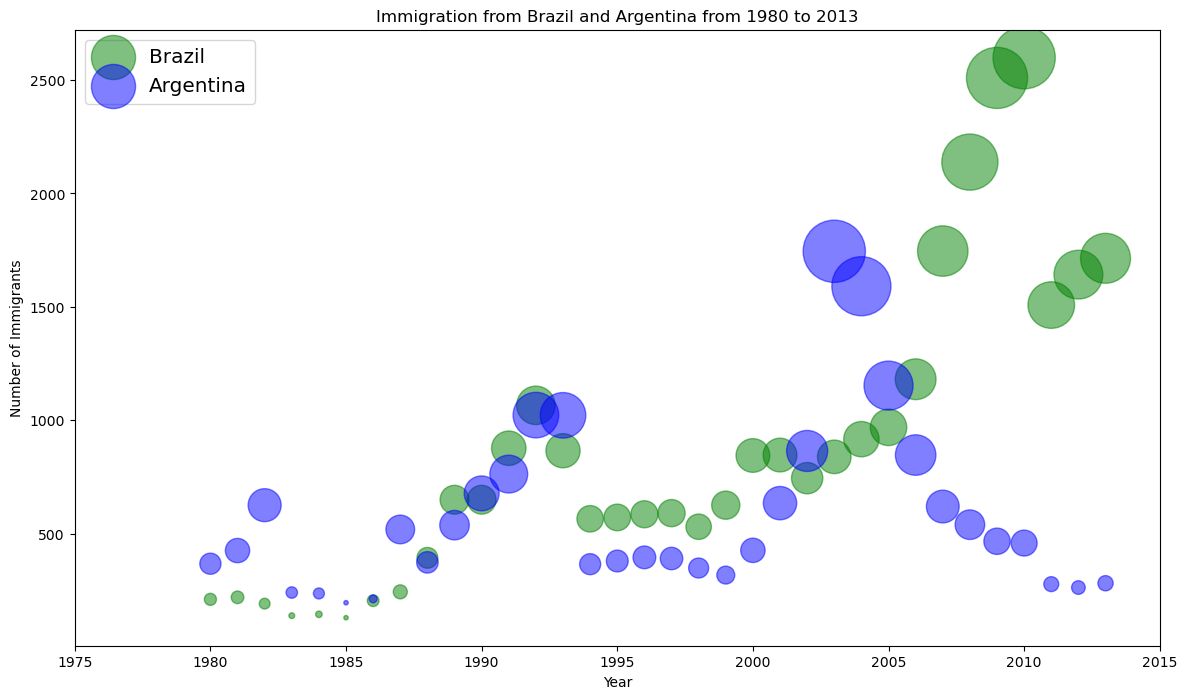

In [59]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

In [60]:
norm_Nigeria = (df_can_t['Nigeria'] - df_can_t['Nigeria'].min()) / (df_can_t['Nigeria'].max() - df_can_t['Nigeria'].min())
norm_Ghana = (df_can_t['Ghana'] - df_can_t['Ghana'].min()) / (df_can_t['Ghana'].max() - df_can_t['Ghana'].min())

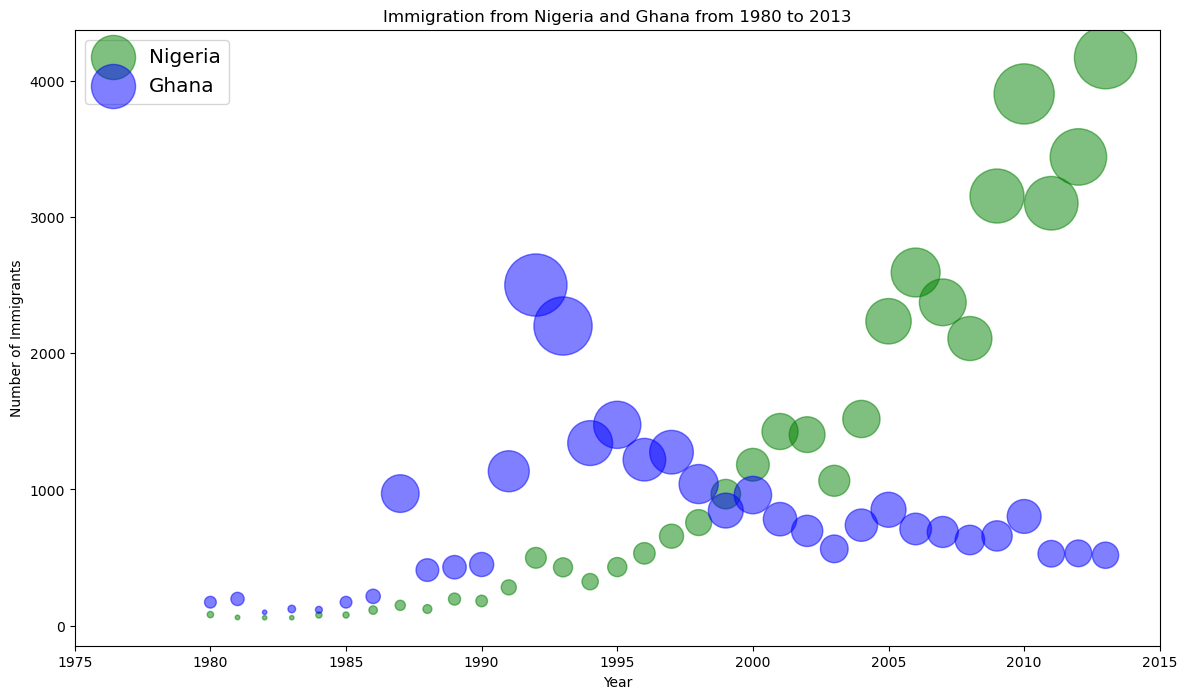

In [61]:

# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Nigeria',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_Nigeria * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Ghana',
                    alpha=0.5,
                    color="blue",
                    s=norm_Ghana * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Nigeria and Ghana from 1980 to 2013')
ax0.legend(['Nigeria', 'Ghana'], loc='upper left', fontsize='x-large')